In [1]:
pip install causal-learn

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------  9.7/9.9 MB 85.8 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 40.8 MB/s eta 0:00:00

   ------ --------------------------------- 1/6 [patsy]
   ------ --------------------------------- 1/6 [patsy]
   ------ --------------------------------- 1/6 [patsy]
   ------------- -------------------------- 2/6 [graphviz]
   ------------- -------------------------- 2/6 [graphviz]
   -------------------------- ------------- 4/6 [statsmodels]
   -------------------------- ------------- 4/6 [statsmodels]
   -------------------------- ------------- 4/6 [statsmodels]
   -------------------------- ------------- 4/6 [statsmodels]
   -------------------------- ------------- 4/6 [statsmodels]
   -------------------------- ------------- 4/6 [statsmodels]
   -------------------------- ------------- 4/6 [statsmodels]
   -------------------------- ------------- 4/6 [statsmo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz

# 데이터 로드 및 전처리
df = pd.read_csv("training_data.csv")
df = df.drop(columns=["Unnamed: 0", "label"])
data_np = df.values
labels = df.columns.tolist()

# PC 알고리즘 실행
cg = pc(data=data_np, indep_test_func=fisherz, alpha=0.01)

# networkx 그래프로 변환
G = cg.to_nx_graph()


Depth=6, working on node 12: 100%|██████████| 13/13 [00:00<00:00, 1000.09it/s]


AttributeError: 'NoneType' object has no attribute 'add_nodes_from'

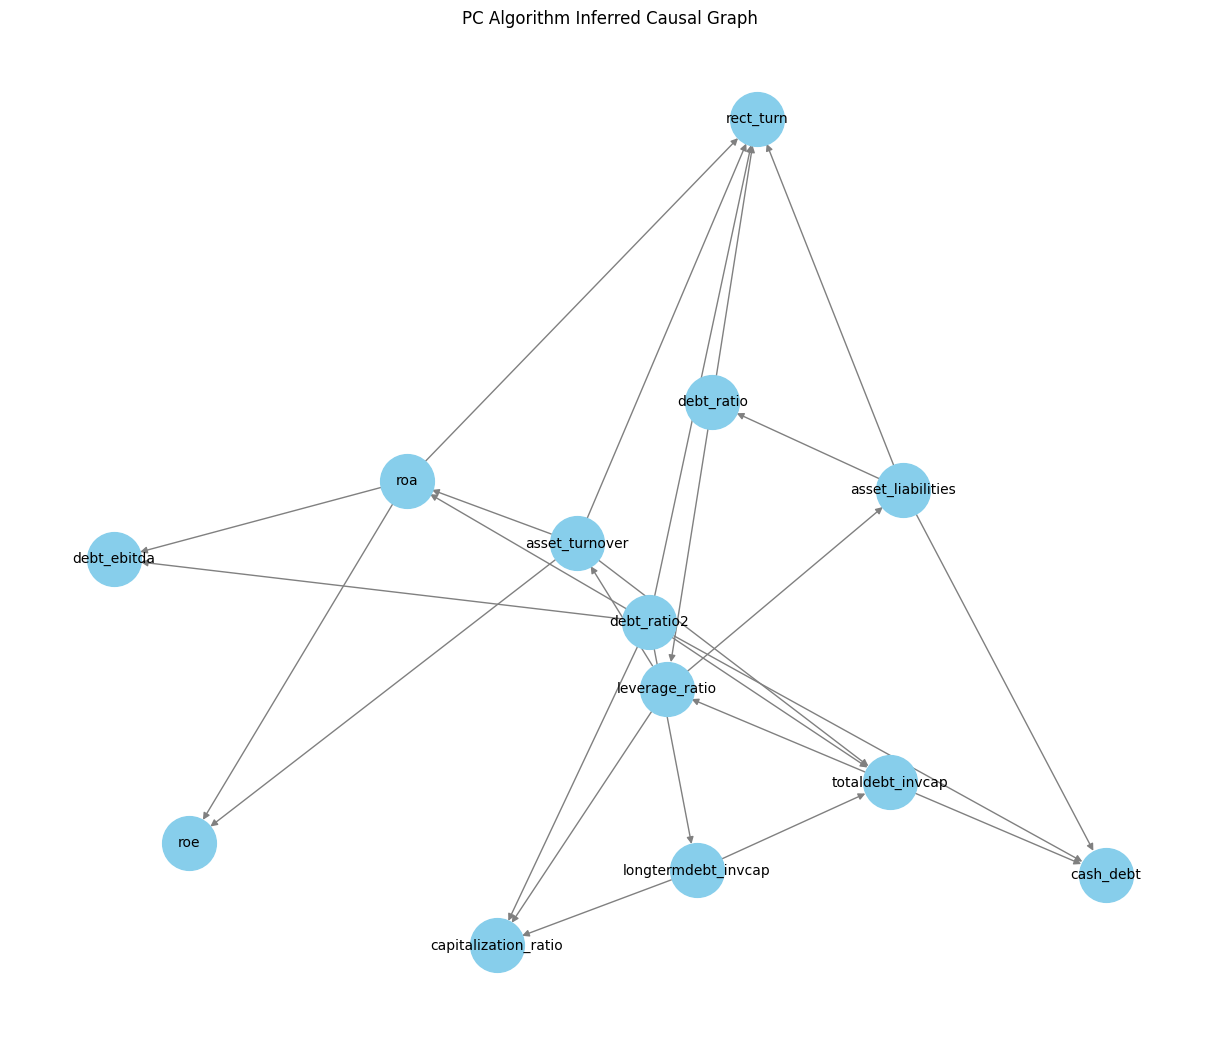

In [10]:
# 3. 네트워크 그래프 객체 수동 생성
G = nx.DiGraph()
for i, node_i in enumerate(labels):
    G.add_node(node_i)

# 4. 엣지 추가 (cg.G.graph는 인접 행렬)
for i in range(len(labels)):
    for j in range(len(labels)):
        if cg.G.graph[i, j] == 1:  # i → j 방향 간선
            G.add_edge(labels[i], labels[j])

# 5. 시각화
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10,
        node_color='skyblue', edge_color='gray', arrows=True)
plt.title("PC Algorithm Inferred Causal Graph")
plt.show()